#### **Exercise 1:**

Last week, we started looking at the Titanic data.  Load that data again. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.  For those that seem important, use a `SimpleImputer` to impute the data.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('/workspaces/fixed-student-lecture-materials-nickmiceli7/3-week3/data/titanic.csv')
titanic.head()

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [25]:
titanic = titanic.drop(['cabin', 'ticket', 'name'], axis=1)
titanic = titanic[~titanic['fare'].isna()]
titanic = titanic[~titanic['embarked'].isna()]

titanic.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.0000,0,0,211.3375,S,1
1,1,male,0.9167,1,2,151.5500,S,1
2,1,female,2.0000,1,2,151.5500,S,0
3,1,male,30.0000,1,2,151.5500,S,0
4,1,female,25.0000,1,2,151.5500,S,0


<Axes: >

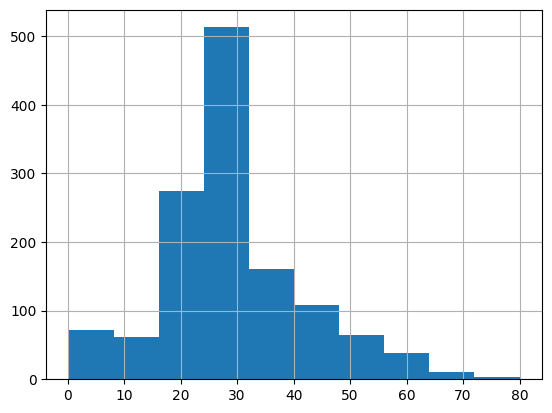

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(titanic[["age"]])
titanic['age']=X[:,0]
titanic.age.hist()

#### **Exercise 2**

Sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

In [27]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop="first", sparse_output=False)
X = ohe.fit_transform(titanic[['embarked', 'sex']])
X

array([[0., 1., 0.],
       [0., 1., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 1.]])

In [28]:
ohe.get_feature_names_out()

array(['embarked_Q', 'embarked_S', 'sex_male'], dtype=object)

In [30]:
titanic[ohe.get_feature_names_out()] = X
titanic = titanic.drop(['sex', 'embarked'], axis=1)
titanic

,pclass,age,sibsp,parch,fare,survived,embarked_Q,embarked_S,sex_male
0,1,29.0000,0,0,211.3375,1,0.0,1.0,0.0
1,1,0.9167,1,2,151.5500,1,0.0,1.0,1.0
2,1,2.0000,1,2,151.5500,0,0.0,1.0,0.0
3,1,30.0000,1,2,151.5500,0,0.0,1.0,1.0
4,1,25.0000,1,2,151.5500,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1304,3,14.5000,1,0,14.4542,0,0.0,0.0,0.0
1305,3,28.0000,1,0,14.4542,0,0.0,0.0,0.0
1306,3,26.5000,0,0,7.2250,0,0.0,0.0,1.0
1307,3,27.0000,0,0,7.2250,0,0.0,0.0,1.0


#### **Exercise 3**

Using 5-fold cross-validation, examine the performance of a LogisticRegression classifier. 

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

lr=LogisticRegression()
X = titanic.drop('survived', axis=1)
y = titanic['survived']

results = cross_val_score(lr, X, y, cv=5)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [32]:
results

array([0.54580153, 0.85440613, 0.81226054, 0.72030651, 0.67049808])

In [34]:
np.mean(results)

np.float64(0.7206545582170746)

#### **Exercise 4**

Replace the logistic regression classifier with a decision tree classifier.  Which works better?  Why do you think that is?

In [35]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

result = cross_val_score(dtc, X, y, cv=5)

In [37]:
result

array([0.5       , 0.77394636, 0.6743295 , 0.67816092, 0.66666667])

In [36]:
np.mean(result)

np.float64(0.6586206896551723)

#### **Exercise 5:** 

See if you can get the decision tree classifier to perform better by adjusting your imputation procedure to use a KNNImputer.

#### **Exercise 6:**

Try using a `GridSearchCV` to optimize the DecisionTree algorithm.  What is the best performance you can achieve?